In [338]:
# imposred neccessary laibraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [339]:
# reading csv file
df=pd.read_csv('netflix_titles.csv')

In [340]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Descriptive Analysis

In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [288]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [342]:
# description of non integer data haivng object data type
df.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [290]:
df.shape

(8807, 12)

In [343]:
# null values count in each column
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

1. as we can see director column has 2634 missing values around 29 %
2. cast column has 825 missing values. around 9.37 %
3. country column has 831 missing values around 9.44 %

In [344]:
# total count of duplicated rows
df.duplicated().sum()

0

##  Handling missing values in specific column

- for missing values in director and cast column we will replace missing values with 'No Data' to maintain data
integrity and avoid bias in analysis

In [293]:
df['director'].replace(np.nan,'No Data',inplace=True)

In [294]:
df['cast'].replace(np.nan,'No Data',inplace=True)

- in country column we will fill missing values with  the mode to ensure data consistency and to minimize data loss

In [295]:
df['country'].replace(np.nan,df['country'].mode()[0],inplace=True)

- rating column has 10 missing values. We will replace this depending on type with mode. we will assing mode of rating for movies and shows seprately

In [296]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

- duration column has 3 missing values we will fill this missing values based on the type of show. we assign the mode of duration of movies and tv shows seprately

In [297]:
movie_duration_mode=df.loc[df['type']=='Movie','duration'].mode()[0]
tv_show_duration_mode=df.loc[df['type']=='TV Show','duration'].mode()[0]


In [298]:
df['duration']=df.apply(lambda x: movie_duration_mode if x['type']=='Movie' and pd.isna(x['duration']) else tv_show_duration_mode if x['type']=='TV Show' and pd.isna(x['duration']) else x['duration'],axis=1)

In [299]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         0
listed_in        0
description      0
dtype: int64

- remaining missing values we will drop 

In [300]:
df.dropna(inplace=True)

In [301]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [302]:
df['date_added']=pd.to_datetime(df['date_added'])

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8793 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8793 non-null   object        
 1   type          8793 non-null   object        
 2   title         8793 non-null   object        
 3   director      8793 non-null   object        
 4   cast          8793 non-null   object        
 5   country       8793 non-null   object        
 6   date_added    8793 non-null   datetime64[ns]
 7   release_year  8793 non-null   int64         
 8   rating        8793 non-null   object        
 9   duration      8793 non-null   object        
 10  listed_in     8793 non-null   object        
 11  description   8793 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 893.0+ KB


In [304]:
df['month_added']=df['date_added'].dt.month
df['month_name_added']=df['date_added'].dt.month_name()
df['year_added']=df['date_added'].dt.year

### Data Transformation : Cast, Country, Listed_In and Director
- we will split the values based on comma seprator and created seprate rows for each value. This will help us to analyze data at more granual level

In [305]:
# cast column
df_cast=df['cast'].str.split(',',expand=True).stack()
df_cast=df_cast.reset_index(level=1,drop=True).to_frame('cast')
df_cast['show_id']=df['show_id']

#Country column
df_country=df['country'].str.split(',',expand=True).stack()
df_country=df_country.reset_index(level=1,drop=True).to_frame('country')
df_country['show_id']=df['show_id']

#listed_in column
df_listed_in=df['listed_in'].str.split(',',expand=True).stack()
df_listed_in=df_listed_in.reset_index(level=1,drop=True).to_frame('df_listed_in')
df_listed_in['show_id']=df['show_id']

#director column
df_director=df['director'].str.split(',',expand=True).stack()
df_director=df_director.reset_index(level=1,drop=True).to_frame('director')
df_director['show_id']=df['show_id']


In [306]:
m_vs_tv['%']

type
Movie      69.703173
TV Show    30.296827
Name: %, dtype: float64

## Data Exploration

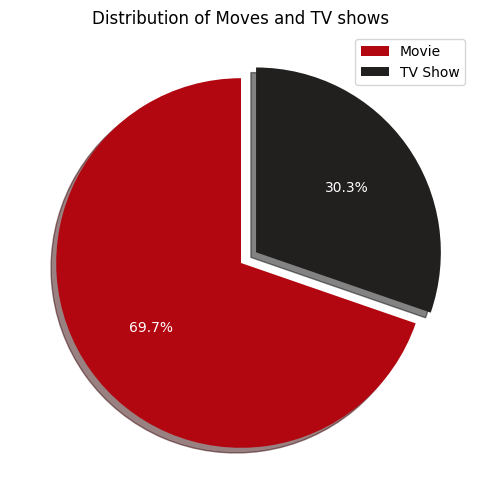

In [307]:
x=df.groupby(['type'])['type'].count()
y=len(df)
r=(x/y)*100

m_vs_tv=pd.DataFrame(r)

m_vs_tv.rename({'type':'%'},axis=1,inplace=True)

plt.figure(figsize=(8,6))

colors=('#b20710','#221f1f')

plt.pie(m_vs_tv['%'],labels=m_vs_tv.index,autopct='%1.1f%%',startangle=90,colors=colors,
       explode=(0,0.1),textprops={'color':'white'},shadow=True)

plt.title('Distribution of Moves and TV shows')

plt.legend()

plt.show()


### Top 10 Countries where Netflix is popular

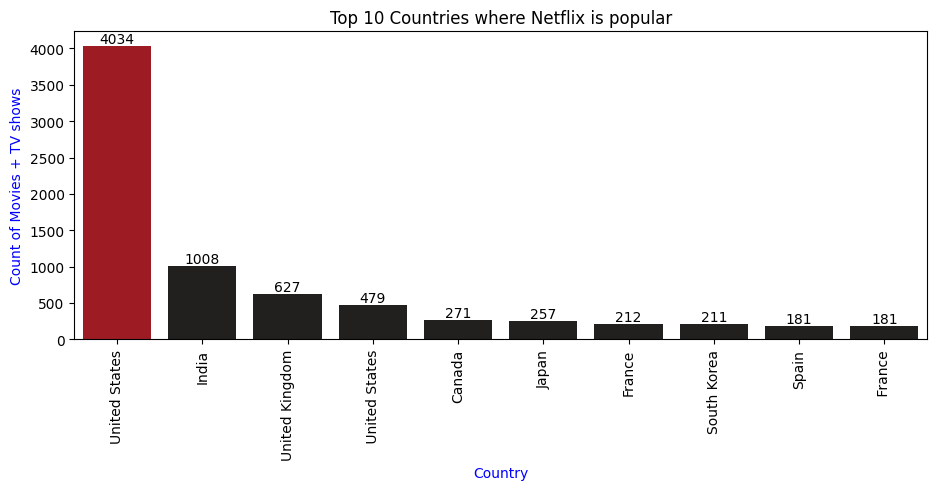

In [308]:
df['country']=df['country'].str.rstrip()
jk=df_country['country'].value_counts(ascending=False).head(10)

plt.figure(figsize=(11,4))
colors=['#b20710']+['#221f1f']*(len(df['country'])-1)
bar_plot=sns.barplot(x=jk.index,y=jk.values,palette=colors)
plt.title('Top 10 Countries where Netflix is popular')
plt.xlabel('Country',color='blue')
plt.xticks(rotation=90)
plt.ylabel('Count of Movies + TV shows',color='blue')

for index,value in enumerate(jk.values):
    bar_plot.text(index,value,str(value),ha='center',va='bottom')

### Top 10 Actors by Movie/TV show count

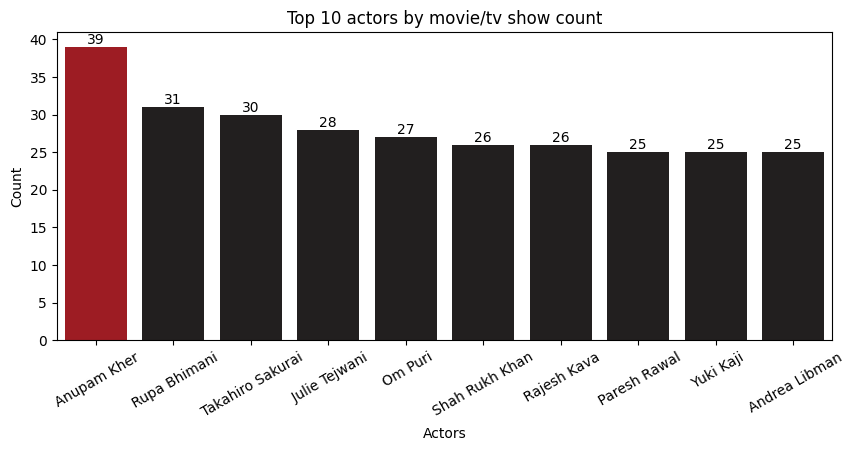

In [309]:
top_10_actors=df_cast['cast'].value_counts()[1:].head(10)
colors=['#b20710']+['#221f1f']*(len(df['country'])-1)
plt.figure(figsize=(10,4))
bar_plot=sns.barplot(x=top_10_actors.index,y=top_10_actors.values,palette=colors)
plt.xticks(rotation=30)
plt.title('Top 10 actors by movie/tv show count')
plt.xlabel('Actors')
plt.ylabel('Count')
for index,value in enumerate(top_10_actors.values):
    bar_plot.text(index,value,str(value),ha='center',va='bottom')
plt.show()

### Top 10 Directors by Movie/TV show count

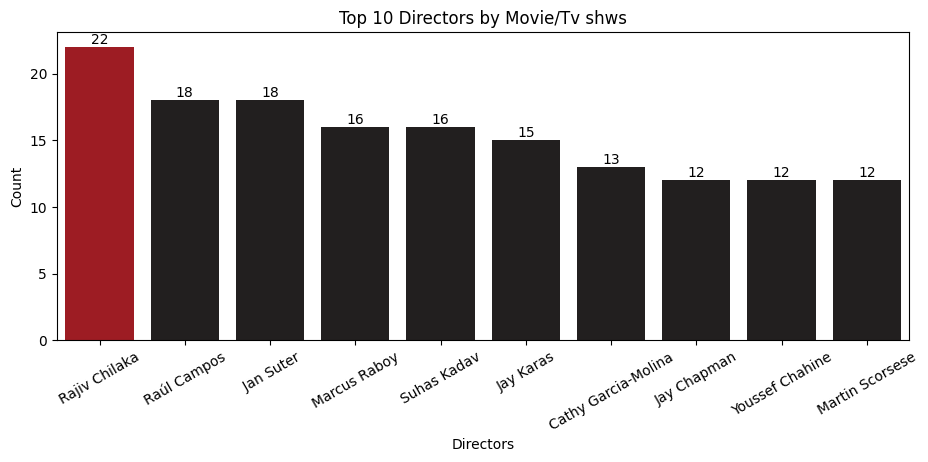

In [310]:
top_10_direc=df_director['director'].value_counts()[1:].head(10)
colors=['#b20710']+['#221f1f']*(len(top_10_direc)-1)
plt.figure(figsize=(11,4))
bar_plot=sns.barplot(x=top_10_direc.index,y=top_10_direc.values,palette=colors)
plt.title('Top 10 Directors by Movie/Tv shws')
plt.xlabel('Directors')
plt.ylabel('Count')
plt.xticks(rotation=30)
for index,value in enumerate(top_10_direc.values):
#     print(index,value)
    bar_plot.text(index,value,str(value),ha='center',va='bottom')
plt.show()

### Top Categories by Movie/TV Shows count

In [311]:
df_listed_in['df_listed_in']=df_listed_in['df_listed_in'].str.strip()
listed_in_countries=df_listed_in['df_listed_in'].value_counts()

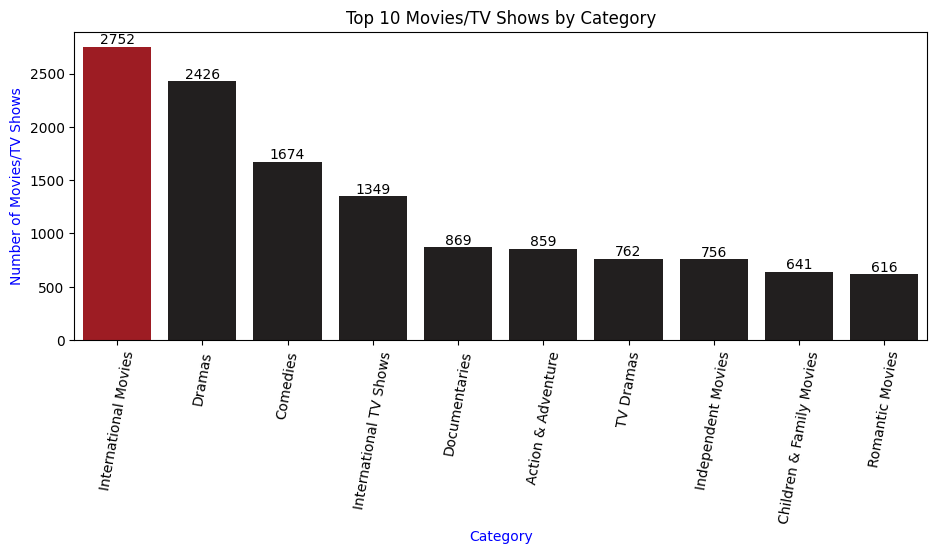

In [312]:

top_listed_in=listed_in_countries.head(10)

plt.figure(figsize=(11,4))
bar_plot=sns.barplot(x=top_listed_in.index,y=top_listed_in.values,palette=colors)
plt.xlabel('Category',color='blue')
plt.ylabel('Number of Movies/TV Shows',color='blue')
plt.xticks(rotation=80)
plt.title('Top 10 Movies/TV Shows by Category')

for index,value in enumerate(top_listed_in.values):
    bar_plot.text(index,value,str(value),ha='center',va='bottom')
plt.show()

- The bar chart shows the top 10 categories of movies and TV shows based on their count. “International Movies” is the most dominant category, followed by “Dramas.”

### Movies and TV Shows added  Overtime

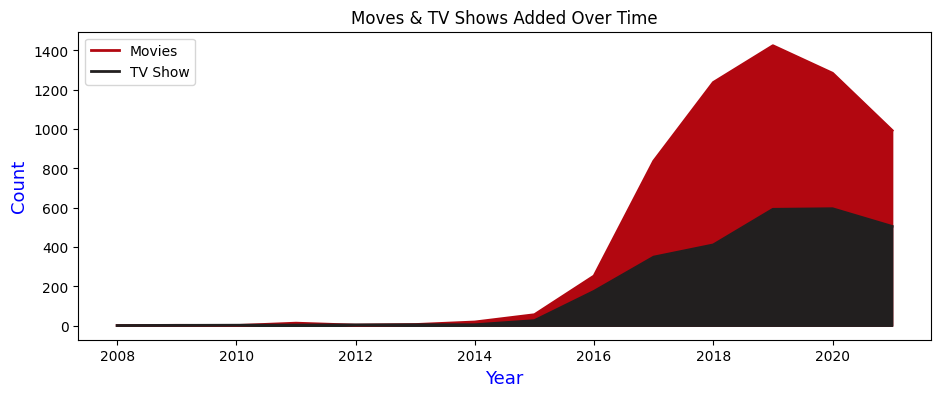

In [313]:
df_movies=df[df['type']=='Movie']
df_tv_shows=df[df['type']=='TV Show']

movies_count=df_movies['year_added'].value_counts().sort_index()
tv_shows_count=df_tv_shows['year_added'].value_counts().sort_index()

plt.figure(figsize=(11,4))
plt.plot(movies_count.index,movies_count.values,color='#b20710',label='Movies',linewidth=2)
plt.plot(tv_shows_count.index,tv_shows_count.values,color='#221f1f',label='TV Show',linewidth=2)

plt.fill_between(movies_count.index,movies_count.values,color='#b20710')
plt.fill_between(tv_shows_count.index,tv_shows_count.values,color='#221f1f')
plt.xlabel('Year',color='Blue', fontsize=13)
plt.ylabel('Count',color='blue', fontsize=13)
plt.title('Moves & TV Shows Added Over Time')
plt.legend()
plt.show()

### Content added per Month

In [314]:
month_order=['January','February','April','May','June','July','August','September','October','November','December']
month_counts=df['month_name_added'].value_counts().loc[month_order]
max_count=month_counts.max()


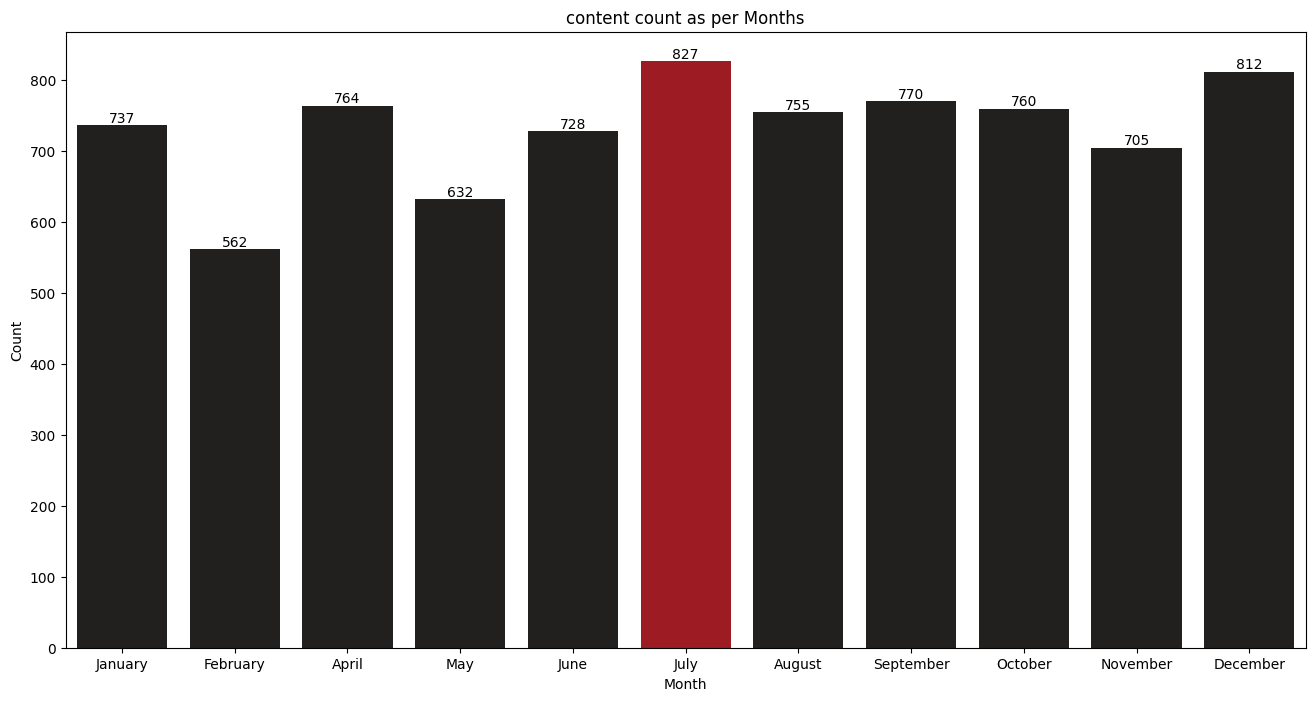

In [315]:
plt.figure(figsize=(16,8))
colors=['#b20710'if count == max_count else '#221f1f' for count in month_counts.values]

bar_plot=sns.barplot(x=month_counts.index,y=month_counts.values,palette=colors)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('content count as per Months')
for index,value in enumerate(month_counts.values):
    bar_plot.text(index,value,str(value),ha='center',va='bottom')
plt.show()

### Distribution of Ratings

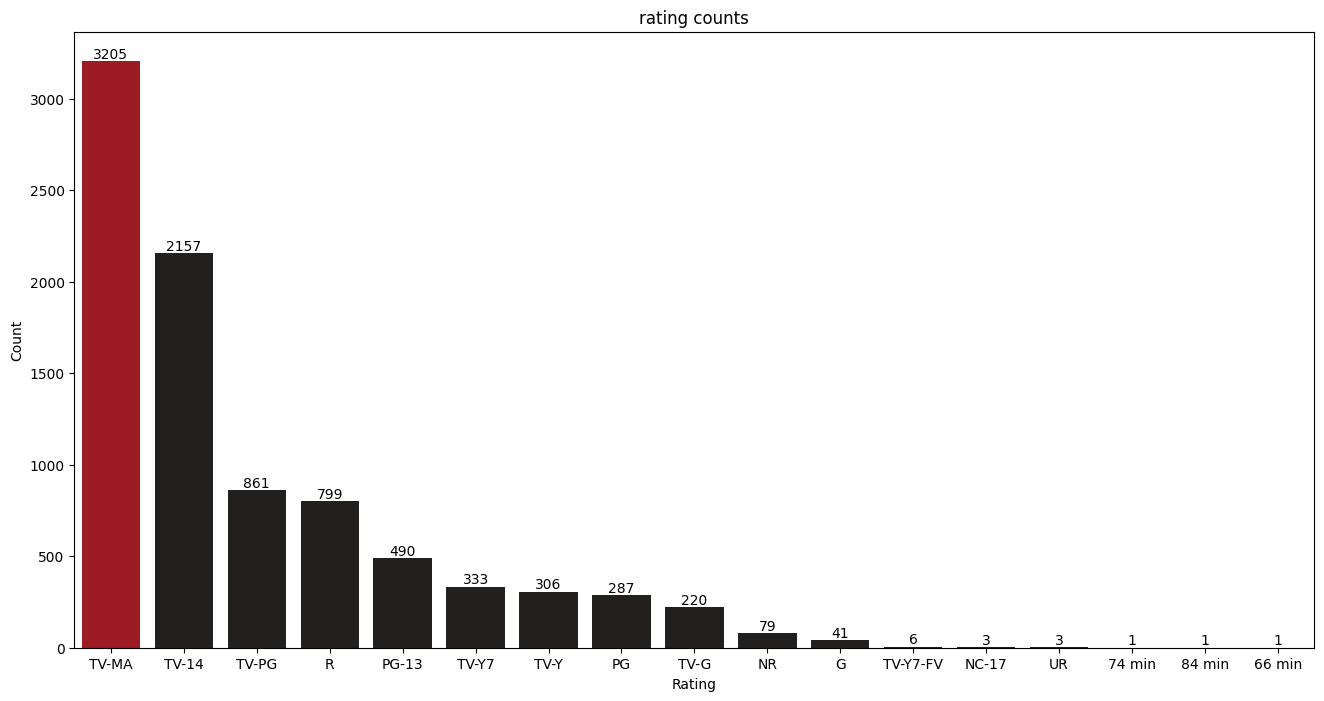

In [316]:
rating_count=df['rating'].value_counts()
max_count=rating_count.max()
plt.figure(figsize=(16,8))
colors=['#b20710'if count == max_count else '#221f1f' for count in rating_count.values]
bar_plot=sns.barplot(x=rating_count.index,y=rating_count.values,palette=colors)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('rating counts')
for index,value in enumerate(rating_count.values):
    bar_plot.text(index,value,str(value),ha='center',va='bottom')

In [334]:
df['rating'].unique().size

17

### Gener Correlation Heatmap

In [317]:
 geners=df['listed_in'].str.split(', ',expand=True).stack().unique()
geners

array(['Documentaries', 'International TV Shows', 'TV Dramas',
       'TV Mysteries', 'Crime TV Shows', 'TV Action & Adventure',
       'Docuseries', 'Reality TV', 'Romantic TV Shows', 'TV Comedies',
       'TV Horror', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'British TV Shows',
       'Comedies', 'Spanish-Language TV Shows', 'Thrillers',
       'Romantic Movies', 'Music & Musicals', 'Horror Movies',
       'Sci-Fi & Fantasy', 'TV Thrillers', "Kids' TV",
       'Action & Adventure', 'TV Sci-Fi & Fantasy', 'Classic Movies',
       'Anime Features', 'Sports Movies', 'Anime Series',
       'Korean TV Shows', 'Science & Nature TV', 'Teen TV Shows',
       'Cult Movies', 'TV Shows', 'Faith & Spirituality', 'LGBTQ Movies',
       'Stand-Up Comedy', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV'], dtype=object)

In [318]:
# gener_data=pd.DataFrame(index=geners,columns=geners,dtype=float)
gener_data.head()

,Documentaries,International TV Shows,TV Dramas,TV Mysteries,Crime TV Shows,TV Action & Adventure,Docuseries,Reality TV,Romantic TV Shows,TV Comedies,...,Science & Nature TV,Teen TV Shows,Cult Movies,TV Shows,Faith & Spirituality,LGBTQ Movies,Stand-Up Comedy,Movies,Stand-Up Comedy & Talk Shows,Classic & Cult TV
Documentaries,1737.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,24.0,66.0,4.0,0.0,0.0,0.0
International TV Shows,0.0,2693.0,1027.0,83.0,595.0,142.0,233.0,198.0,629.0,477.0,...,26.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,14.0
TV Dramas,0.0,1027.0,1521.0,122.0,360.0,114.0,6.0,2.0,240.0,209.0,...,2.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
TV Mysteries,0.0,83.0,122.0,194.0,46.0,14.0,8.0,2.0,2.0,4.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
Crime TV Shows,0.0,595.0,360.0,46.0,934.0,80.0,208.0,2.0,20.0,54.0,...,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0


In [319]:
gener_data.fillna(0,inplace=True)


In [320]:

# Iterate over each row in the original DataFrame and update the genre data DataFrame
for _, row in df.iterrows():
    listed_in = row['listed_in'].split(', ')
    for genre1 in listed_in:
        for genre2 in listed_in:
            gener_data.at[genre1, genre2] += 1
            



In [337]:
# Create a correlation matrix using the genre data
correlation_matrix = gener_data.corr()
# correlation_matrix.max()

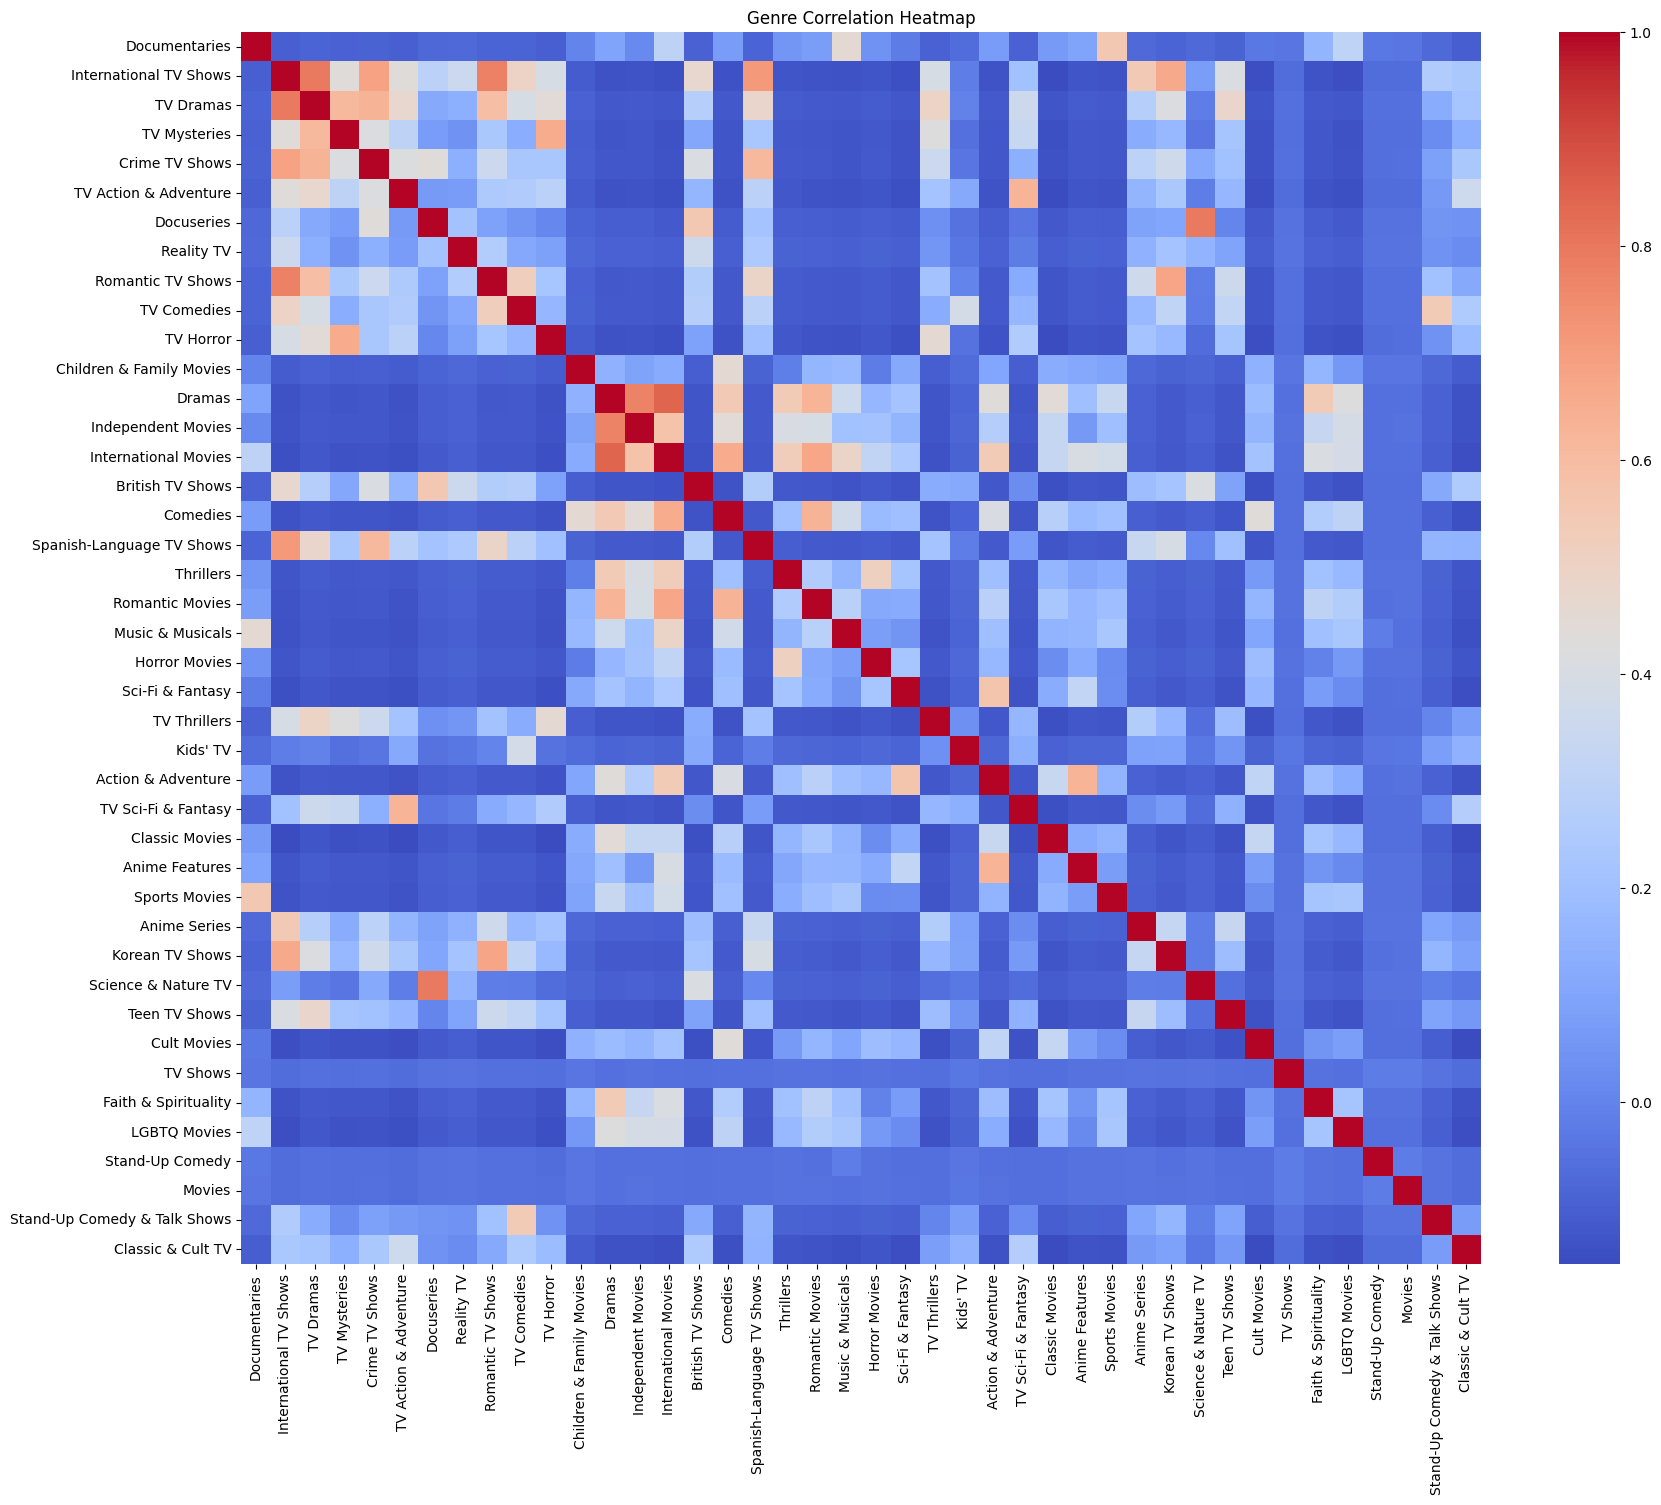

In [322]:
# Create the heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')

# Customize the plot
plt.title('Genre Correlation Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Show the plot
plt.show()

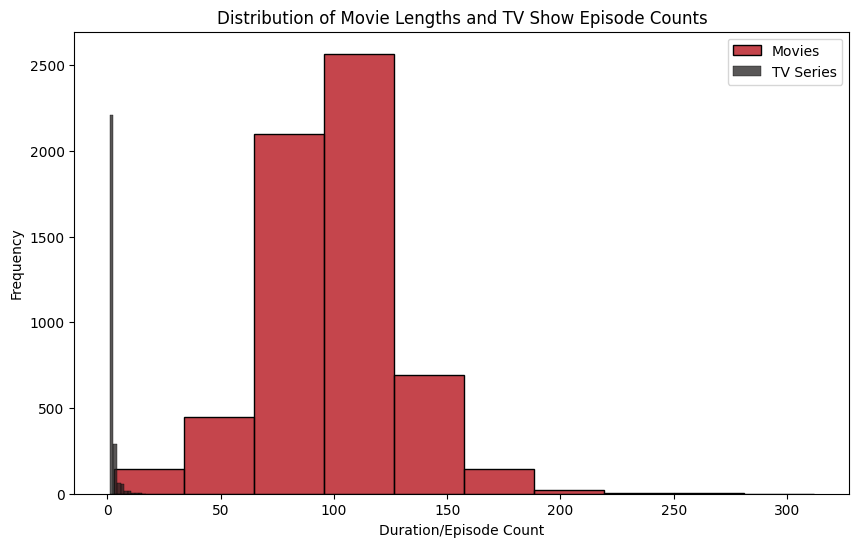

In [323]:
movie_length=df[df['type']=='Movie']['duration'].str.split().apply(lambda x :x[0]).astype(int)
tv_series_episodes=df[df['type']=='TV Show']['duration'].str.extract('(\d+)',expand=False).astype(int)

plt.figure(figsize=(10,6))
sns.histplot(movie_length,bins=10,color='#b20710', label='Movies')
sns.histplot(tv_series_episodes,bins=10,color='#221f1f',label='TV Series')

# Customize the plot
plt.xlabel('Duration/Episode Count')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Lengths and TV Show Episode Counts')
plt.legend()

# Show the plot
plt.show()


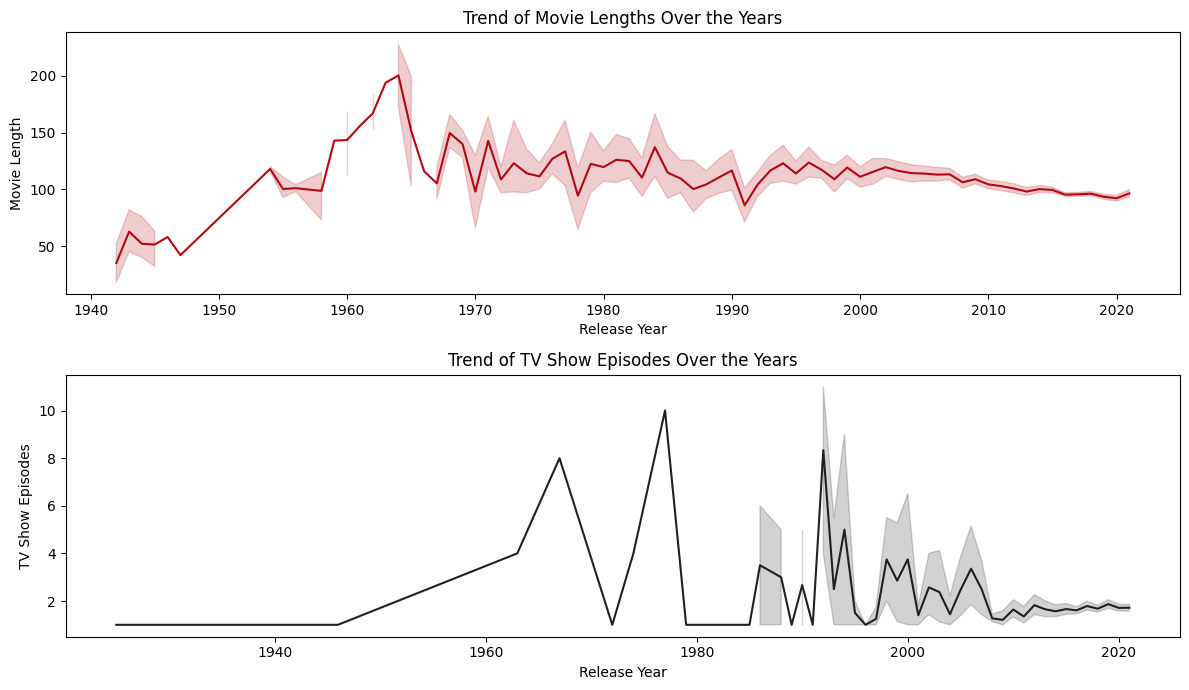

In [324]:
df_movies=df[df['type']=='Movie']
df_tv_shows=df[df['type']=='TV Show']

plt.figure(figsize=(12,7))
plt.subplot(2,1,1)
sns.lineplot(data=df_movies,x='release_year',y=movie_length,color=colors[0])
plt.xlabel('Release Year')
plt.ylabel('Movie Length')
plt.title('Trend of Movie Lengths Over the Years')

plt.subplot(2,1,2)
sns.lineplot(data=df_tv_shows,x='release_year',y=tv_series_episodes,color=colors[1])
plt.xlabel('Release Year')
plt.ylabel('TV Show Episodes')
plt.title('Trend of TV Show Episodes Over the Years')
plt.tight_layout()
plt.show()

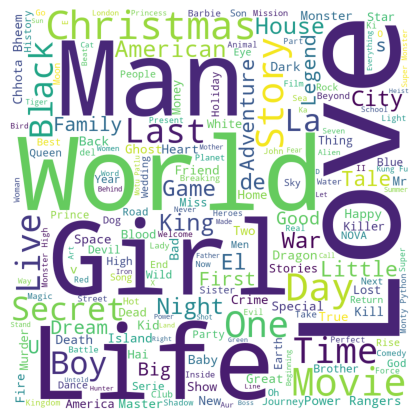

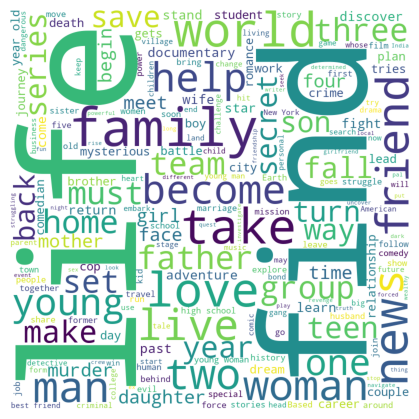

In [325]:
from wordcloud import WordCloud

# Concatenate all the titles into a single string
text = ' '.join(df['title'])

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(text)
 
# plot the WordCloud image
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


# Concatenate all the titles into a single string
text = ' '.join(df['description'])

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(text)
 
# plot the WordCloud image
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11996\3568423260.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['duration'] = df_movies['duration'].str.extract('(\d+)', expand=False).astype(int)


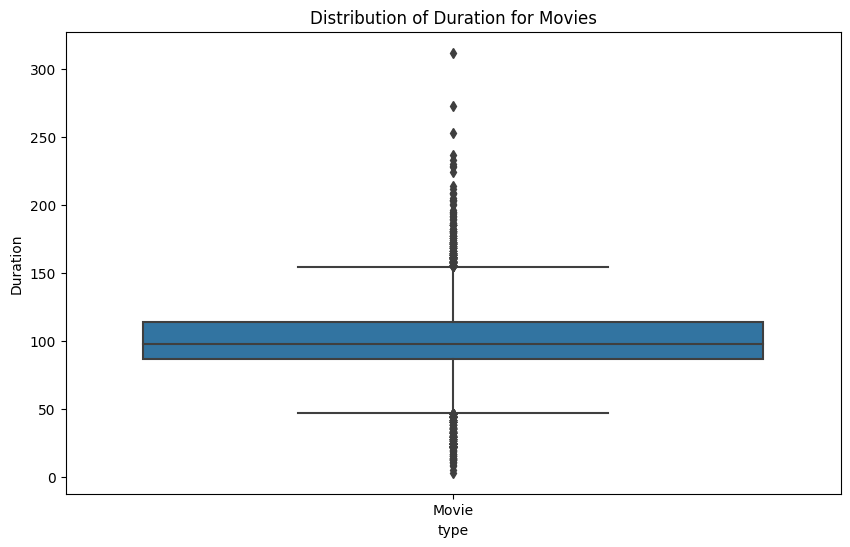

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11996\3568423260.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tv_shows['duration'] = df_tv_shows['duration'].str.extract('(\d+)', expand=False).astype(int)


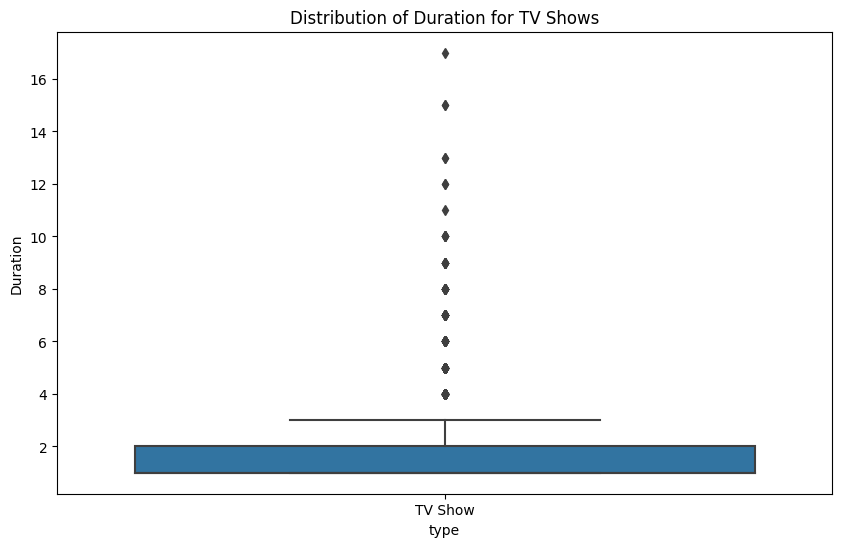

In [326]:
# Extracting and converting the duration for movies
df_movies['duration'] = df_movies['duration'].str.extract('(\d+)', expand=False).astype(int)

# Creating a boxplot for movie duration
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_movies, x='type', y='duration')
# plt.xlabel('Content Type')
plt.ylabel('Duration')
plt.title('Distribution of Duration for Movies')
plt.show()


# Extracting and converting the duration for TV shows
df_tv_shows['duration'] = df_tv_shows['duration'].str.extract('(\d+)', expand=False).astype(int)

# Creating a boxplot for TV show duration
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_tv_shows, x='type', y='duration')
# plt.xlabel('Content Type')
plt.ylabel('Duration')
plt.title('Distribution of Duration for TV Shows')
plt.show()


### Insights--

1. 69.7% content on Netflix is Movies type and remaining 30.9% is of TV Show type.
2. United States is the Top most country where Netflix is famous. From 2008 to 2021 around 4034 contents (Movies/TV shows) added on Netflix from United States. With 1008 count India is at 2nd number where Netflix is popular.
3. Anupam Kher appeared 39 times in different type of contents on Netflix which is highest count.
4. Also Rajiv Chilaka has highest count of directing Movies/TV shwos on Netflix.
5. Top3 content categories on Netflix are International Movies, Dramas, Comedies respectively.
6. from 2016 there was fast growth of Netflix. In 2019 netflix added highest number of content. but this count reduced in 2020 ( this is due to Covid most probably)
7. from 2008 to 2021 if we see total conent added per Month then July and December are the two top most months in which around 827 and 812 content added respectively.
8. Around 36% of conent on Netflix is of TV-MA rating, and 24.5% of TV-14 rating .basically around 60% content of TV-MA & TV-14 rating.
9. most common duration of movies is between 90 to 120 and for TV shows 1 season.